<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [30]:
# mnist(60000, ): [3, 1, 4, 5]
# cifar10(50000, 1): [[3], [1], [4], [5]]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
trans = [    
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

horse


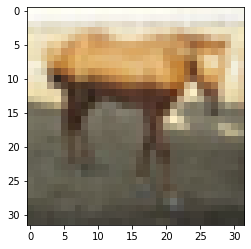

In [32]:
import matplotlib.pyplot as plt
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 一個filter: 3(kh) * 3(kw) * 3(last channel) + 1(bias) = 28. 
    # 28 * 64 = 1792 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    # 一個filter: 3 * 3 * 64 + 1(bias) = 577
    # 128 * 577 = 73856
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),   
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [34]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [35]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0 

In [36]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar10.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 7s - loss: 1.6576 - accuracy: 0.3906 - val_loss: 1.2564 - val_accuracy: 0.5518
Epoch 2/100
225/225 - 6s - loss: 1.1969 - accuracy: 0.5726 - val_loss: 1.0219 - val_accuracy: 0.6358
Epoch 3/100
225/225 - 6s - loss: 1.0004 - accuracy: 0.6510 - val_loss: 0.8870 - val_accuracy: 0.6942
Epoch 4/100
225/225 - 6s - loss: 0.8762 - accuracy: 0.6941 - val_loss: 0.8063 - val_accuracy: 0.7232
Epoch 5/100
225/225 - 6s - loss: 0.7749 - accuracy: 0.7306 - val_loss: 0.7432 - val_accuracy: 0.7450
Epoch 6/100
225/225 - 6s - loss: 0.6959 - accuracy: 0.7583 - val_loss: 0.7216 - val_accuracy: 0.7496
Epoch 7/100
225/225 - 6s - loss: 0.6261 - accuracy: 0.7803 - val_loss: 0.6966 - val_accuracy: 0.7580
Epoch 8/100
225/225 - 6s - loss: 0.5570 - accuracy: 0.8055 - val_loss: 0.6631 - val_accuracy: 0.7726
Epoch 9/100
225/225 - 6s - loss: 0.5074 - accuracy: 0.8230 - val_loss: 0.6857 - val_accuracy: 0.7756
Epoch 10/100
225/225 - 6s - loss: 0.4517 - accuracy: 0.8430 - val_loss: 0.7081 - val_accura

In [37]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6978 - accuracy: 0.7644


[0.6978240609169006, 0.7644000053405762]

In [44]:
proba = model.predict(x_test_norm)
pre = proba.argmax(axis=1)
print(pre.shape)
print(y_test.shape)
y_test_1d = y_test.reshape(10000)
print(y_test_1d.shape)

(10000,)
(10000, 1)
(10000,)


In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# tf: predict -> sklearn: predict_proba
# axis: 0(縱) 1(橫)
mat = confusion_matrix(y_test_1d, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(trans[i]) for i in range(10)],
             columns=["{}(預測)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),813,13,23,22,19,11,5,13,49,32
automobile(正確),26,844,6,5,5,5,9,2,18,80
bird(正確),71,4,621,59,90,64,42,32,12,5
cat(正確),20,4,50,575,73,181,41,34,11,11
deer(正確),14,2,58,43,742,29,41,60,11,0
dog(正確),12,1,30,149,50,689,15,45,4,5
frog(正確),7,0,38,73,30,26,814,6,2,4
horse(正確),10,4,29,34,60,37,3,818,1,4
ship(正確),50,14,7,14,6,5,2,2,883,17
truck(正確),37,50,6,12,7,9,4,14,16,845


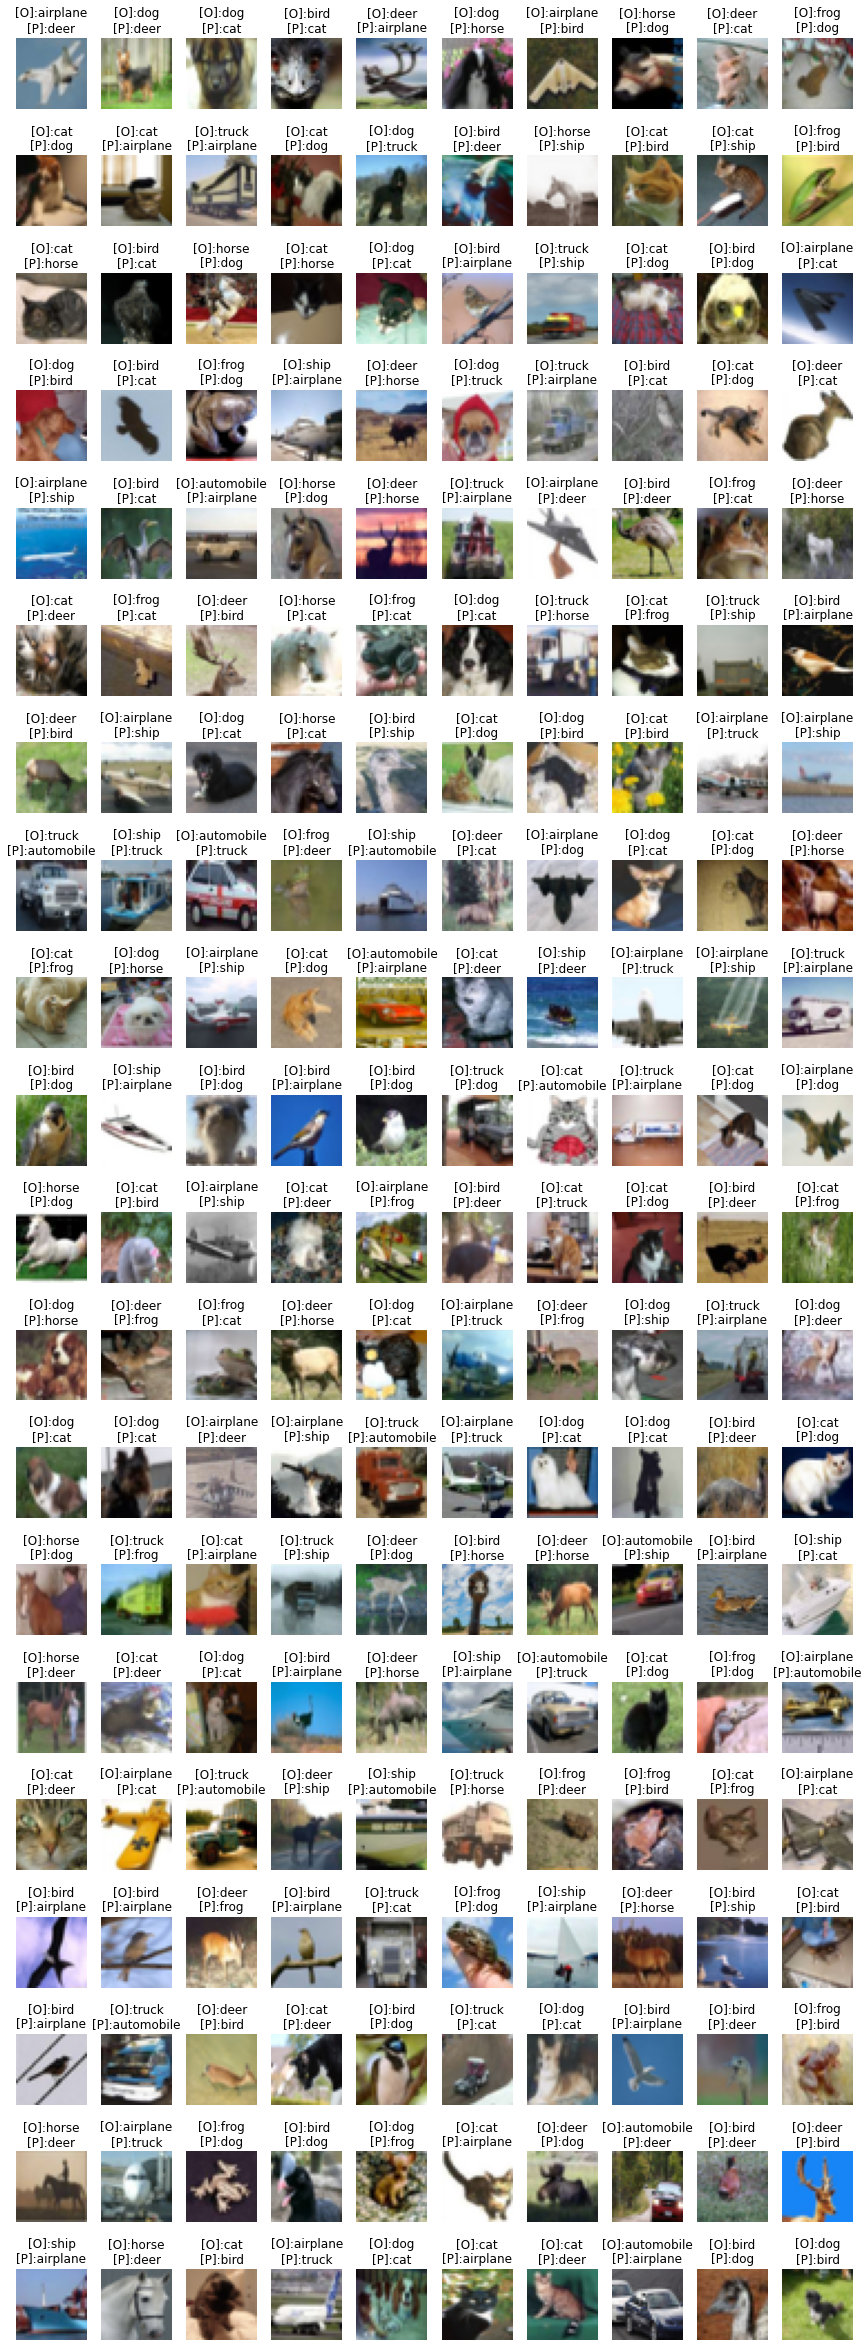

In [48]:
import numpy as np
idx = np.nonzero(pre != y_test_1d)[0]
idx = idx[:200]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test_1d[idx]

plt.figure(figsize=(15, 45))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

Enter:https://www.poaipets.com.tw/wp-content/uploads/2021/03/%E5%89%96%E6%9E%90%E7%8B%97%E7%8B%97%E5%B8%B8%E8%A6%8B%E7%96%BE%E7%97%85-800x480.jpg
預測: dog


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


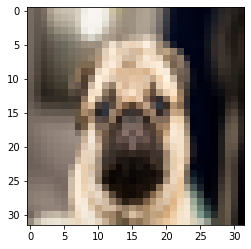

In [52]:
import requests
# pillow
from PIL import Image
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
ans = model.predict(img_np).argmax(axis=1)
print("預測:", trans[ans[0]])
plt.imshow(img)